In [207]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid" , font_scale=1.1)
#从本地导入Iris数据集
col_names = ['sepal-length' , 'sepal-width', 'petal-length','petal-width' ,'Class']
Iris = pd.read_csv('Iris.csv',names=col_names , header=0)
Iris.head(5) #输出进来看看

,sepal-length,sepal-width,petal-length,petal-width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [208]:
# 读取特征和标签的值
# iloc 方法是基于 integer-location 的索引，X 是把所有的行和第0列到第3列的数值取出来
X = Iris.iloc[:,:4].values
Y = Iris.iloc[:,4].values 

#### 利用 seaborn 画个图
pairlot 叫做两两关系图 , 主对角线是各个属性的分布图，而非对角线上是两个不同属性之间的相关图。\
参数 hue 是针对某一字断的颜色显现出来，不同类别的点会以不同的颜色显现出来

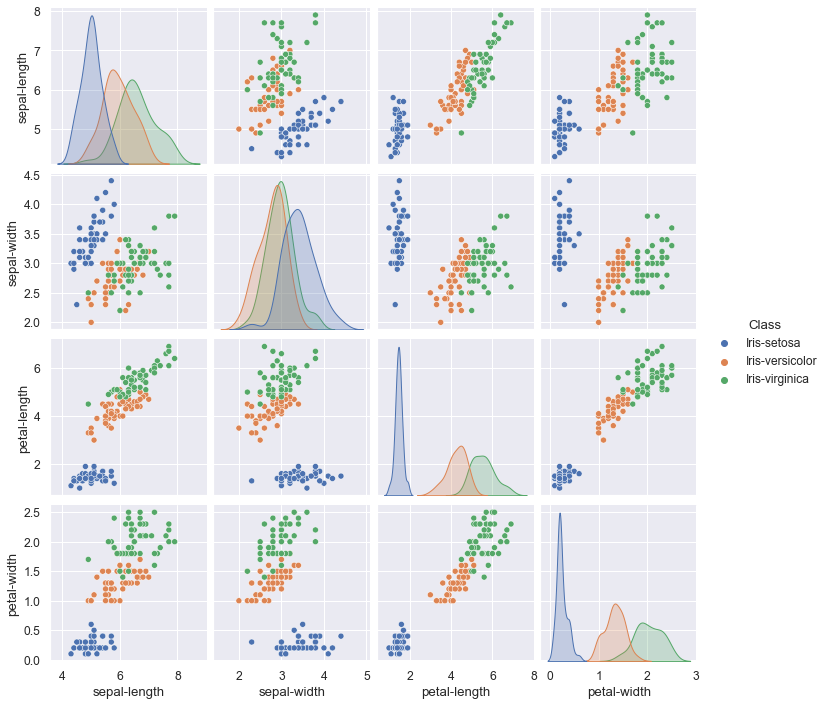

In [209]:
sns.pairplot(data=Iris,hue="Class")

In [225]:
# 划分数据集
# 测试集和训练集 7:3
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.3)

In [226]:
# 特征缩放
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)  #计算矩阵每一列的均值和方差
print("均值是{}, 方差是{}".format(scaler.mean_ , scaler.var_))
X_train = scaler.transform(X_train) # transform() 方法是根据算出来的均值和方差进行标准化
X_test = scaler.transform(X_test)

均值是[5.91428571 3.04190476 3.84666667 1.24285714], 方差是[0.73760544 0.19233923 3.34306032 0.6302585 ]


#### 利用KNN 进行训练和预测

In [227]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

knn_clf = KNeighborsClassifier(n_neighbors=1 , metric='minkowski' , p=2)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
cm = confusion_matrix(y_test , y_pred)
print("预测是的准确度是:{}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

预测是的准确度是:0.9555555555555556
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



#### 也可以自己创建数据进行预测

In [228]:
X_new = np.array([[2,2.9,1,0.2] , [3.0,4.0,1.0,0.3]])
y_new_pre = knn_clf.predict(X_new)
print("Prediction:" ,y_new_pre)

Prediction: ['Iris-virginica' 'Iris-virginica']


    0   1  2
0  15   0  0
1   0  20  1
2   0   1  8


<AxesSubplot:>

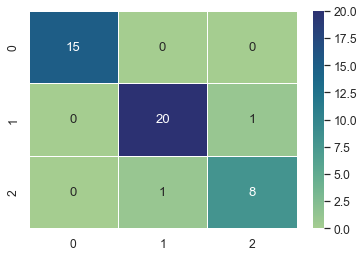

In [234]:
# 可以将混淆矩阵画成热力图的形式
df_cm = pd.DataFrame(cm)
print(df_cm)
sns.heatmap(df_cm , annot=True ,cmap="crest",linewidths=0.5)

#### 比较 K 值的选择和准确率之间的关系

In [242]:
error = []
acc = []
for i in range(1 , 40):
    knn_clf = KNeighborsClassifier(n_neighbors = i , metric = "minkowski" , p = 2)
    knn_clf.fit(X_train,y_train)
    pred_i = knn_clf.predict(X_test)
    error.append([i , np.mean(pred_i != y_test)])
    acc.append([i , np.mean(pred_i == y_test)])

<AxesSubplot:xlabel='K', ylabel='Accuracy'>

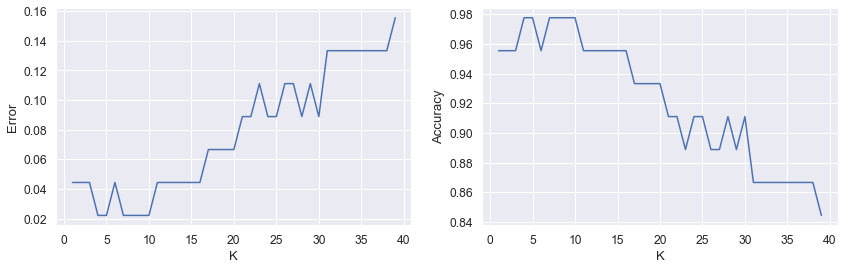

In [244]:
df_error = pd.DataFrame(error)
df_acc = pd.DataFrame(acc)
df_error.columns = ['K','Error']
df_acc.columns = ['K','Accuracy']
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.lineplot(data=df_error , x='K' , y='Error')
plt.subplot(122)
sns.lineplot(data=df_acc , x='K' , y='Accuracy')